In [61]:
import nmresearch as nmr # this loads data from brucker files 
import pickle # this loads data from saved numpy arrays

import numpy as np
import scipy as sp

import matplotlib
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline

In [62]:
# decent color schemes for plots and such

#colors=["#115f9a", "#1984c5", "#22a7f0", "#48b5c4", "#76c68f", "#a6d75b", "#c9e52f", "#d0ee11", "#d0f400"]
colors = ['#d73027','#f46d43','#fdae61','#fee090','#ffffbf','#e0f3f8','#abd9e9','#74add1','#4575b4']
colors_single = ['#fff5eb','#fee6ce','#fdd0a2','#fdae6b','#fd8d3c','#f16913','#d94801','#a63603','#7f2704']
colors_single.reverse()
zcorr_str = r"$\langle$ $\hat{S}_z (nT)$ $\hat{S}_z$ $\rangle$ (a.u.)"

plt.rcParams.update({'font.size': 14})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

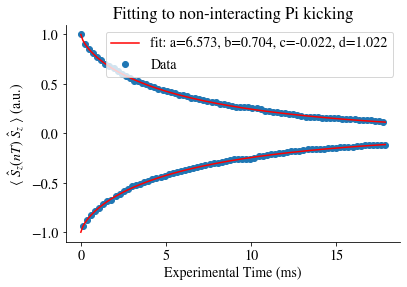

fitting std errors
[0.13670943 0.01064717 0.00904775 0.01266126]


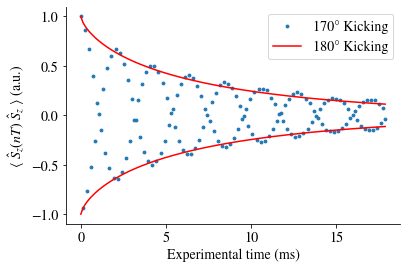

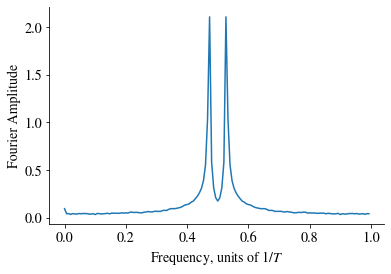

In [63]:
# 170 deg kicking

try:
    val_offres = pickle.load(open("nonint_170.dat", "rb"))
except (OSError, IOError) as e:
    val_offres=nmr.Experiment(328).tpc(add_spline=False)
    with open('nonint_170.dat', 'wb') as fi:
        pickle.dump(val_offres, fi)


# fitting to Pi-kicking
try:
    val_good = pickle.load(open("nonint_180.dat", "rb"))
except (OSError, IOError) as e:
    val_good=nmr.Experiment(358).tpc(add_spline=False)
    with open('nonint_180.dat', 'wb') as fi:
        pickle.dump(val_good, fi)


decay=abs(val_good)
x = np.arange(0,150)*120/1000
def func(x, a, b, c, d):
    return d*np.exp(- (x / a) ** b ) + c

popt, pcov = curve_fit(func, x, decay, p0=[2, 4/5, 0, 1])
perr = np.sqrt(np.diag(pcov))

plt.plot(x, func(x, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
plt.plot(x, -func(x, *popt), 'r-')
plt.scatter(x, val_good,label="Data")
plt.title("Fitting to non-interacting Pi kicking")
plt.xlabel("Experimental Time (ms)")
plt.ylabel(zcorr_str)
plt.legend()
plt.yticks(np.arange(-1, 1.5, .5))
plt.show()

print("fitting std errors")
print(perr)


# beating and fit

plt.scatter(x,val_offres,s=8,label="170\xb0 Kicking")
plt.plot(x, func(x, *popt), 'r-', label="180\xb0 Kicking")
plt.plot(x, -func(x, *popt), 'r-')
plt.legend()
plt.xlabel(r"Experimental time (ms)")
plt.ylabel(zcorr_str)
plt.yticks(np.arange(-1, 1.5, .5))
plt.savefig("nonint.png",format='png',dpi=900,bbox_inches='tight')
plt.show()


# Fourier of Beating

fourier = abs(sp.fft.fft(val_offres, norm="ortho"))
freq = [i*(1/(len(x))) for i in range(len(x))]
plt.plot(freq, fourier)
plt.xlabel(r"Frequency, units of $1/T$")
plt.ylabel(r"Fourier Amplitude")
plt.savefig("nonint_freq.png",format='png',dpi=900,bbox_inches='tight')
plt.show()

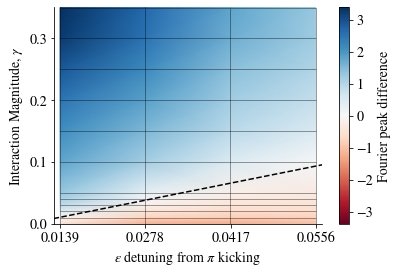

In [64]:
# Phase Diagram Plot

cnst2=[0,0.01,0.02,0.03,0.04,0.05,0.1,0.15,0.2,0.25,0.3,0.35]
kicks=np.arange(0,100)
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
theta = [160,165,170,175]
eps = [(180-ang)/360 for ang in theta]

res = np.zeros( (4,len(cnst2)) )
off_res = np.zeros( (4,len(cnst2)) )

# 160
try:
    vals160 = pickle.load(open("phase160.dat", "rb"))
except (OSError, IOError) as e:
    vals160=nmr.Experiment(393).load_tpc3d()
    with open('phase160.dat', 'wb') as fi:
        pickle.dump(vals160, fi)
        

fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals160])
off_res[0] = np.array([ft[44] for ft in fourier])
res[0] = np.array([ft[50] for ft in fourier])


# 165
try:
    vals165 = pickle.load(open("phase165.dat", "rb"))
except (OSError, IOError) as e:
    vals165=nmr.Experiment(402).load_tpc3d()
    with open('phase165.dat', 'wb') as fi:
        pickle.dump(vals165, fi)

fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals165])
off_res[1] = np.array([ft[46] for ft in fourier])
res[1] = np.array([ft[50] for ft in fourier])


# 170
try:
    vals170 = pickle.load(open("phase170.dat", "rb"))
except (OSError, IOError) as e:
    vals170=nmr.Experiment(391).load_tpc3d()
    with open('phase170.dat', 'wb') as fi:
        pickle.dump(vals170, fi)

fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals170])
off_res[2] = np.array([ft[47] for ft in fourier])
res[2] = np.array([ft[50] for ft in fourier])


# 175
vals175=nmr.Experiment(398).load_tpc3d()

try:
    vals175 = pickle.load(open("phase175.dat", "rb"))
except (OSError, IOError) as e:
    vals175=nmr.Experiment(398).load_tpc3d()
    with open('phase175.dat', 'wb') as fi:
        pickle.dump(vals175, fi)

fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals175])
off_res[3] = np.array([ft[49] for ft in fourier])
res[3] = np.array([ft[50] for ft in fourier])


Z = -1*(off_res-res)
Y=np.array([cnst2,cnst2,cnst2,cnst2])
X=np.array([eps for _ in range(12)]).transpose()


fig, ax = plt.subplots()
z_min, z_max = -np.abs(Z).max(), np.abs(Z).max()
c = ax.pcolormesh(X, Y, Z, cmap='RdBu', vmin=z_min, vmax=z_max,shading='gouraud',edgecolors='k', linewidths=4)
fig.colorbar(c, ax=ax,label="Fourier peak difference")



xp = np.linspace(.0, .07, 100)
plt.plot(xp, xp*(1.987)-0.017,"k--", label="Boundary")
plt.xlabel(r"$\epsilon$ detuning from $\pi$ kicking")
plt.ylabel(r"Interaction Magnitude, $\gamma$")

delta = .001
w=.75
alph=.5
plt.hlines(cnst2, eps[0],eps[-1],'k',linewidth=w, alpha=alph)
plt.vlines(eps,cnst2[0],cnst2[-1],'k',linewidth=w,alpha=alph)

ticks = [round(val,4) for val in eps]
plt.xticks(ticks)

plt.xlim([eps[-1]-delta,eps[0]+delta])
plt.ylim([cnst2[0]-delta,cnst2[-1]+delta])


plt.savefig('smooth_phase_diag_temp.pdf', format='pdf',dpi=900,bbox_inches='tight')

plt.show()

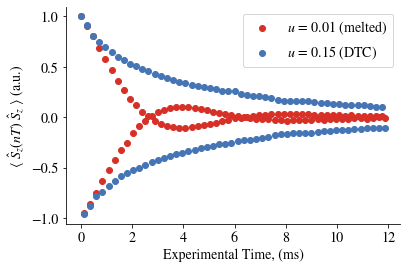

In [65]:
plt.scatter(np.array(kicks)*120/1000,vals175[1],label=r"$u$ = {:.2f} (melted)".format(cnst2[1]),color=colors[0])


plt.scatter(np.array(kicks)*120/1000,vals175[7],label=r"$u$ = {:.2f} (DTC)".format(cnst2[7]),color=colors[-1])
plt.legend()
plt.xlabel("Experimental Time, (ms)")
plt.ylabel(zcorr_str)
plt.yticks(np.arange(-1, 1.5, .5))
plt.savefig('intro_plot_v2.png',format='png',dpi=900,bbox_inches='tight')  
plt.show()

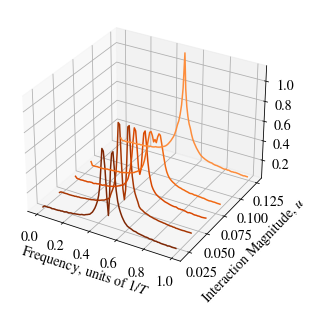

In [66]:
# internal Hamiltonain, Frequency domain

try:
    vals0ih = pickle.load(open("dtc_internal.dat", "rb"))
except (OSError, IOError) as e:
    vals0ih = nmr.Experiment(437).load_tpc3d()
    with open('dtc_internal.dat', 'wb') as fi:
        pickle.dump(vals0ih, fi)
    
kicks=np.array(list(range(vals0ih.shape[1])))
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
eps=(180-170)/360

cnst2=np.array([2.5, 5, 7.5, 10, 15, 30, 45, 60])/120

fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals0ih])

plt.figure(figsize=(5,5))

ax = plt.axes(projection='3d')

for idx, val in enumerate(cnst2[0:5]):
    xline = freq
    yline = [val for _ in range(len(freq))]
    zline = fourier[idx]
    ax.plot3D(xline, yline, zline, color=colors_single[idx])

plt.xlabel(r"Frequency, units of $1/T$")
plt.ylabel(r"Interaction Magnitude, $u$", labelpad=8)
plt.yticks([(i+1)*0.025 for i in range(5)])
plt.savefig("period_double.pdf",format='pdf',dpi=900,bbox_inches='tight')
plt.show()

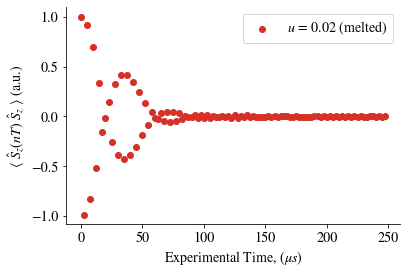

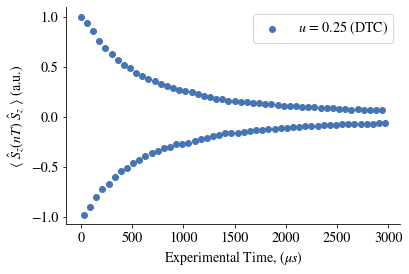

In [67]:
plt.scatter(kicks*cnst2[0]*120,vals0ih[0],label=r"$u$ = {:.2f} (melted)".format(cnst2[0]),color=colors[0])
plt.legend()
plt.xlabel("Experimental Time, ($\mu s$)")
plt.ylabel(zcorr_str)
plt.yticks(np.arange(-1, 1.5, .5))
plt.savefig("int_ham_melt.pdf", format='pdf', dpi=900,bbox_inches='tight')
plt.show()
plt.scatter(kicks*cnst2[5]*120,vals0ih[5],label=r"$u$ = {:.2f} (DTC)".format(cnst2[5]),color=colors[-1])
plt.legend()
plt.xlabel("Experimental Time, ($\mu s$)")
plt.ylabel(zcorr_str)
plt.yticks(np.arange(-1, 1.5, .5))
plt.savefig("int_ham_dtc.pdf", format='pdf', dpi=900,bbox_inches='tight')
plt.show()

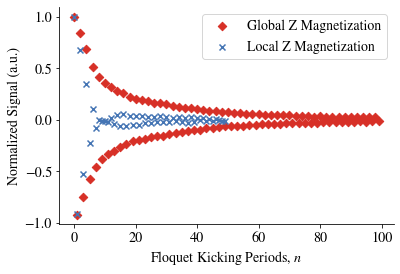

In [68]:
# Local v Global Plot

try:
    vals_local = pickle.load(open("local_dtc.dat", "rb"))
except (OSError, IOError) as e:
    vals_local=nmr.Experiment(455).load_tpc3d()
    with open('local_dtc.dat', 'wb') as fi:
        pickle.dump(vals_local, fi)
        
try:
    vals_global = pickle.load(open("global_dtc.dat", "rb"))
except (OSError, IOError) as e:
    vals_global=nmr.Experiment(451).load_tpc3d()
    with open('global_dtc.dat', 'wb') as fi:
        pickle.dump(vals_global, fi)

plt.scatter(list(range(100)), vals_global[10], label=r"Global Z Magnetization",color=colors[0],marker="D")
plt.scatter(list(range(50)), vals_local[10], label=r"Local Z Magnetization",color=colors[-1],marker="x")
plt.legend()
plt.xlabel(r"Floquet Kicking Periods, $n$")
plt.ylabel(r"Normalized Signal (a.u.)")
plt.yticks(np.arange(-1, 1.5, .5))
plt.savefig('local_v_global.pdf', format='pdf', dpi=900,bbox_inches='tight')  
plt.show()

In [69]:
# various Z fields at 170 degree kicking

cnst2_first=[0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15]

try:
    vals0 = pickle.load(open("dtc170z0_v1.dat", "rb"))
except (OSError, IOError) as e:
    vals0=nmr.Experiment(447).load_tpc3d()
    with open('dtc170z0_v1.dat', 'wb') as fi:
        pickle.dump(vals0, fi)

cnst2_rest=[0,0.01,0.02,0.03,0.04,0.05,0.1,0.15,0.2,0.25,0.3,0.35]

try:
    vals45 = pickle.load(open("dtc170z45_v1.dat", "rb"))
except (OSError, IOError) as e:
    vals45=nmr.Experiment(408).load_tpc3d()
    with open('dtc170z45_v1.dat', 'wb') as fi:
        pickle.dump(vals45, fi)
        
try:
    vals90 = pickle.load(open("dtc170z90_v1.dat", "rb"))
except (OSError, IOError) as e:
    vals90=nmr.Experiment(407).load_tpc3d()
    with open('dtc170z90_v1.dat', 'wb') as fi:
        pickle.dump(vals90, fi)
        
try:
    vals135 = pickle.load(open("dtc170z135_v1.dat", "rb"))
except (OSError, IOError) as e:
    vals135=nmr.Experiment(419).load_tpc3d()
    with open('dtc170z135_v1.dat', 'wb') as fi:
        pickle.dump(vals135, fi)
        
try:
    vals180 = pickle.load(open("dtc170z180_v1.dat", "rb"))
except (OSError, IOError) as e:
    vals180=nmr.Experiment(414).load_tpc3d()
    with open('dtc170z180_v1.dat', 'wb') as fi:
        pickle.dump(vals180, fi)
        
def two_timescale_fit(vals,cut,phi,save=None,use_title=True,show=True):
    
    y=-np.log(abs(vals))
    x=list(range(len(vals)))
   
    plt.scatter(x[0:cut],y[0:cut],s=4)
    p1 = np.polyfit(x[0:cut],y[0:cut],1)
    x1 = np.arange(0,x[cut],.1)
    f1 = p1[0]*x1+p1[1]
    plt.plot(x1,f1,label=r"$\tau_1$ = {:.2f}".format(1/p1[0]))

    plt.scatter(x[cut:-1],y[cut:-1],s=4)
    p2 = np.polyfit(x[cut:-1],y[cut:-1],1)
    x2 = np.arange(x[cut],x[-1],1)
    f2 = p2[0]*x2+p2[1]
    plt.plot(x2,f2,label=r"$\tau_2$ = {:.2f}".format(1/p2[0]))

    plt.legend()
    if use_title:
        plt.title(r"$\gamma={},hT={}$".format(phi[0], phi[1]))
    plt.xlabel(r"Floquet Kicking Periods, $n$")
    plt.ylabel(r"$-\log(|\langle$ $\hat{S}_z (nT)$ $\hat{S}_z$ $\rangle|)$")
    if save is not None:
        plt.savefig(save+".pdf", format='pdf', dpi=900,bbox_inches='tight')
    if show:
        plt.show()
    
def two_timescale_fit_adaptive(vals,phi,save=None,use_title=True,show_r=False):
    n = len(vals)
    y=-np.log(abs(vals))
    x=list(range(n))
    
    r_vec = []
    r_opt = 0
    cut = 0
    for c in range(4,n-4):
        lr1 = sp.stats.linregress(x[0:c],y[0:c])
        lr2 = sp.stats.linregress(x[cut:-1],y[cut:-1])
        r = np.sqrt(lr1.rvalue**2 + lr2.rvalue**2)
        r_vec.append(r)
        if r > r_opt:
            cut=c
            r_opt=r
    
    if show_r:
        print(r_opt)
        plt.scatter(list(range(4,n-4)),r_vec)
        plt.show()
    
    
    plt.scatter(x[0:cut],y[0:cut],s=4)
    p1 = np.polyfit(x[0:cut],y[0:cut],1)
    x1 = np.arange(0,x[cut],.1)
    f1 = p1[0]*x1+p1[1]
    plt.plot(x1,f1,label=r"$\tau_1$ = {:.2f}".format(1/p1[0]))

    plt.scatter(x[cut:-1],y[cut:-1],s=4)
    p2 = np.polyfit(x[cut:-1],y[cut:-1],1)
    x2 = np.arange(x[cut],x[-1],1)
    f2 = p2[0]*x2+p2[1]
    plt.plot(x2,f2,label=r"$\tau_2$ = {:.2f}".format(1/p2[0]))

    plt.legend()
    if use_title:
        plt.title(r"$\gamma={},hT={}$".format(phi[0], phi[1]))
    plt.xlabel(r"Floquet Kicking Periods, $n$")
    plt.ylabel(r"$-\log(|\langle$ $\hat{S}_z (nT)$ $\hat{S}_z$ $\rangle|)$")
    if save is not None:
        plt.savefig(save+".pdf", format='pdf', dpi=900,bbox_inches='tight')
    plt.show()

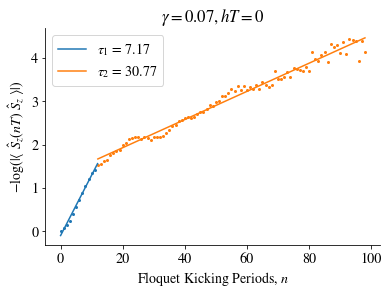

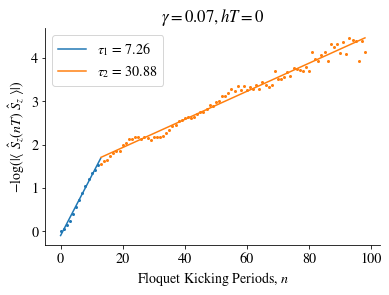

In [70]:
two_timescale_fit(vals0[2],12,(cnst2_first[2], '0'),"fit_ht0")
two_timescale_fit_adaptive(vals0[2],(cnst2_first[2], '0'),"fit_ht0_adp")

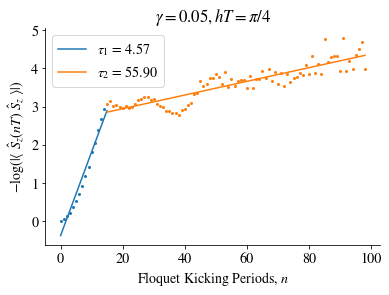

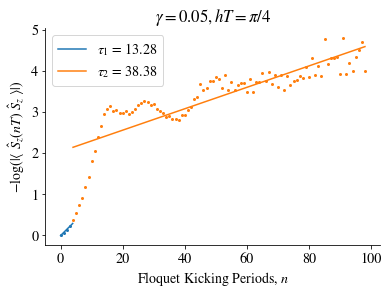

In [71]:
two_timescale_fit(vals45[5],15,(cnst2_rest[5], r'\pi/4'),"fit_ht45")
two_timescale_fit_adaptive(vals45[5],(cnst2_rest[5], r'\pi/4'),"fit_ht45_adp")

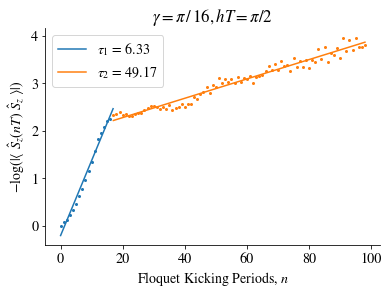

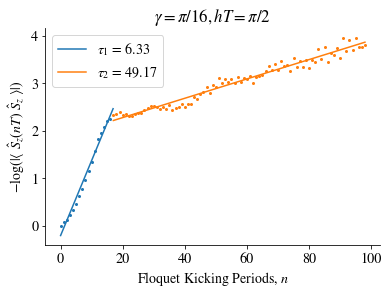

In [72]:
two_timescale_fit(vals90[5],17,(r'\pi \, / \, 16', r'\pi/2'),"fit_ht90")
two_timescale_fit_adaptive(vals90[5],(r'\pi / 16', r'\pi/2'),"fit_ht90_adp")

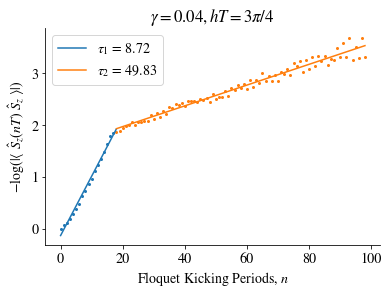

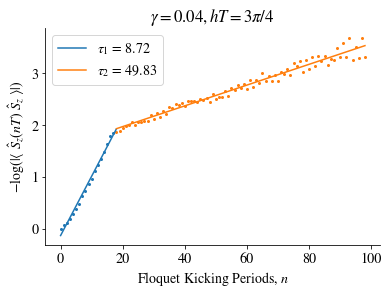

In [73]:
two_timescale_fit(vals135[4],18,(cnst2_rest[4], r'3\pi/4'),"fit_ht135")
two_timescale_fit_adaptive(vals135[4],(cnst2_rest[4], r'3\pi/4'),"fit_ht135_adp")

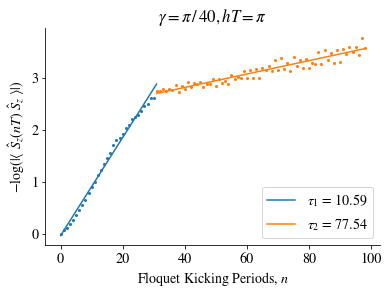

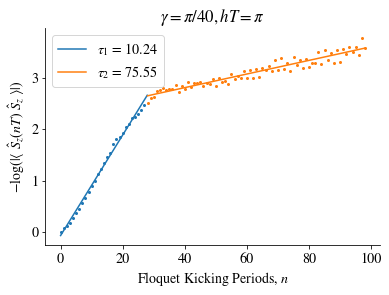

In [74]:
two_timescale_fit(vals180[2],31, (r'\pi\,/\,40', r'\pi'),"fit_ht180")
two_timescale_fit_adaptive(vals180[2], (r'\pi/40', r'\pi'),"fit_ht180_adp")

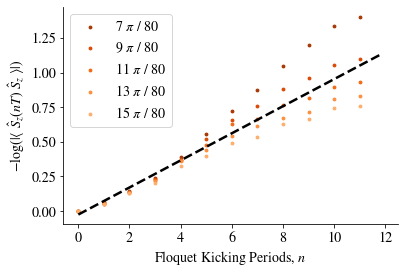

In [75]:
x_fit = []
y_fit = []
kicks=list(range(100))
numerator = [int(val*100) for val in cnst2_first]
lab = [str(num)+r" $\pi$ / 80" for num in numerator]
cut=12
for idx in range(2,len(cnst2_first)):
    x_fit.extend(kicks[0:cut])
    y_fit.extend(-np.log(abs(vals0[idx,0:cut])))
p = np.polyfit(x_fit,y_fit,1)
x1 = np.arange(0,kicks[cut],.1)
f1 = p[0]*x1+p[1]

for idx in range(2,len(cnst2_first),2):
    plt.scatter(kicks[0:cut],-np.log(abs(vals0[idx,0:cut])),label=lab[idx], color=colors_single[int(idx/2)],s=8)

x=np.arange(0,cut,.1)
plt.plot(x1,f1,'k--',linewidth=2.5)
plt.legend()
plt.xlabel(r"Floquet Kicking Periods, $n$")
plt.ylabel(r"$-\log(|\langle$ $\hat{S}_z (nT)$ $\hat{S}_z$ $\rangle|)$")
#plt.title(r"Fitting to Prethermal U(1) DTC, $hT=0$, various $u$")
plt.savefig("early_fit.pdf",format='pdf',dpi=900,bbox_inches='tight')
plt.show()

In [76]:
400/5

80.0

In [77]:
lab

['5 $\\pi$ / 80',
 '6 $\\pi$ / 80',
 '7 $\\pi$ / 80',
 '8 $\\pi$ / 80',
 '9 $\\pi$ / 80',
 '10 $\\pi$ / 80',
 '11 $\\pi$ / 80',
 '12 $\\pi$ / 80',
 '13 $\\pi$ / 80',
 '14 $\\pi$ / 80',
 '15 $\\pi$ / 80']

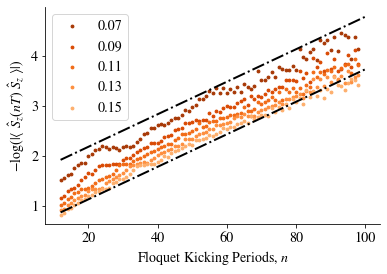

In [78]:
p2 = np.polyfit(kicks[cut:-1],-np.log(abs(vals0[2,cut:-1])),1)
x2 = np.arange(kicks[cut],kicks[-1],1)
f2 = p2[0]*x2+p2[1]

for idx in range(2,len(cnst2_first),2):
    plt.scatter(kicks[cut:-1], -np.log(abs(vals0[idx,cut:-1])),label=cnst2_first[idx], color=colors_single[int(idx/2)],s=8)

x=np.arange(cut,100,.1)
plt.plot(x,x*p2[0]+p2[1]+.25,'k-.',linewidth=2)
plt.plot(x,x*p2[0]+p2[1]-.8,'k-.',linewidth=2)
plt.legend()
plt.xlabel(r"Floquet Kicking Periods, $n$")
plt.ylabel(r"$-\log ( | \langle$ $\hat{S}_z (nT)$ $\hat{S}_z$ $\rangle | )$")
#plt.title(r"Fitting to Prethermal U(1) DTC, $hT=0$, various $u$")
plt.savefig("late_fit.pdf",format='pdf',dpi=900,bbox_inches='tight')
plt.show()

In [79]:
# variable epsilon, variable z-field

cnst2 = [0.0, 0.02, 0.04, 0.06, 0.08, 0.10]
theta = [175, 170, 165]
eps = [(180-ang)/360 for ang in theta]

try:
    vals175z0 = pickle.load(open("dtc175z0.dat", "rb"))
except (OSError, IOError) as e:
    vals175z0=nmr.Experiment(549).load_tpc3d()
    with open('dtc175z0.dat', 'wb') as fi:
        pickle.dump(vals175z0, fi)

try:
    vals175z90 = pickle.load(open("dtc175z90.dat", "rb"))
except (OSError, IOError) as e:
    vals175z90=nmr.Experiment(550).load_tpc3d()
    with open('dtc175z90.dat', 'wb') as fi:
        pickle.dump(vals175z90, fi)
        
try:
    vals175z180 = pickle.load(open("dtc175z180.dat", "rb"))
except (OSError, IOError) as e:
    vals175z180=nmr.Experiment(553).load_tpc3d()
    with open('dtc175z180.dat', 'wb') as fi:
        pickle.dump(vals175z180, fi)
        
try:
    vals170z0 = pickle.load(open("dtc170z0.dat", "rb"))
except (OSError, IOError) as e:
    vals170z0=nmr.Experiment(554).load_tpc3d()
    with open('dtc170z0.dat', 'wb') as fi:
        pickle.dump(vals170z0, fi)
        
try:
    vals170z90 = pickle.load(open("dtc170z90.dat", "rb"))
except (OSError, IOError) as e:
    vals170z90=nmr.Experiment(561).load_tpc3d()
    with open('dtc170z90.dat', 'wb') as fi:
        pickle.dump(vals170z90, fi)
        
try:
    vals170z180 = pickle.load(open("dtc170z180.dat", "rb"))
except (OSError, IOError) as e:
    vals170z180=nmr.Experiment(562).load_tpc3d()
    with open('dtc170z180.dat', 'wb') as fi:
        pickle.dump(vals170z180, fi)
        
try:
    vals165z0 = pickle.load(open("dtc165z0.dat", "rb"))
except (OSError, IOError) as e:
    vals165z0=nmr.Experiment(565).load_tpc3d()
    with open('dtc165z0.dat', 'wb') as fi:
        pickle.dump(vals165z0, fi)
        
try:
    vals165z90 = pickle.load(open("dtc165z90.dat", "rb"))
except (OSError, IOError) as e:
    vals165z90=nmr.Experiment(566).load_tpc3d()
    with open('dtc165z90.dat', 'wb') as fi:
        pickle.dump(vals165z90, fi)
        
try:
    vals165z180 = pickle.load(open("dtc165z180.dat", "rb"))
except (OSError, IOError) as e:
    vals165z180=nmr.Experiment(565).load_tpc3d()
    with open('dtc165z180.dat', 'wb') as fi:
        pickle.dump(vals165z180, fi)

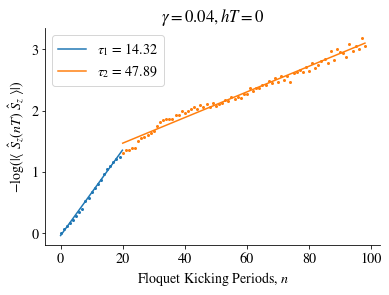

In [80]:
two_timescale_fit(vals175z0[2],20,(cnst2[2],0))

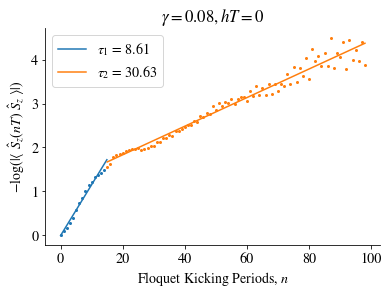

In [81]:
two_timescale_fit(vals170z0[4],15,(cnst2[4],0))

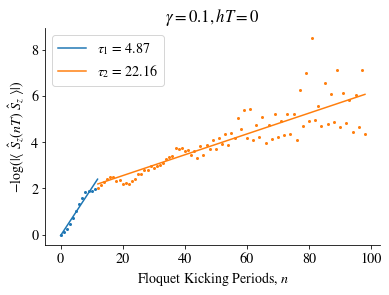

In [82]:
two_timescale_fit(vals165z0[5],12,(cnst2[5],0))

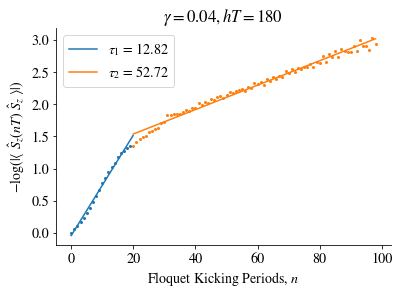

In [83]:
two_timescale_fit(vals175z180[2],20,(cnst2[2],180))

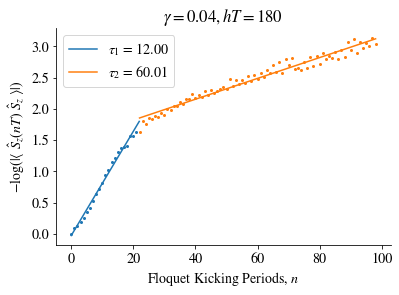

In [84]:
two_timescale_fit(vals170z180[2],22,(cnst2[2],180))

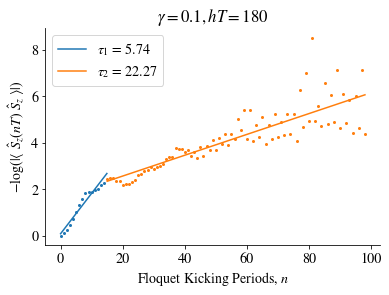

In [85]:
two_timescale_fit(vals165z180[5],15,(cnst2[5],180))

In [86]:

def func(x, a, b, c, d):
    return d * np.exp(- (x / a) ** b ) + c

def fancy_fit(vals, T, real_time=True, save=None, use_title=True,ylabel=None):
    decay=abs(vals)
    x = np.arange(0,len(decay))
    guess=25
    if real_time:
        x = x*T
        guess=2000
    
    popt, pcov = curve_fit(func, x, decay, p0=[guess, 4/5, 0, 1])
    perr = np.sqrt(np.diag(pcov))

    plt.plot(x, func(x, *popt), 'r-',label=r'Fit: $\tau_F$=%5.3f, b=%5.3f' % tuple(popt[0:2]))
    plt.plot(x, -func(x, *popt), 'r-')
    plt.scatter(x, vals,label="Data")
    if use_title:
        plt.title("T={}us".format(T))
    if real_time:
        plt.xlabel("Experimental Time (us)")
    else:
        plt.xlabel("Floquet Kicking Periods")
    
    plt.ylabel(zcorr_str) if ylabel is None else plt.ylabel(ylabel)
    
    plt.yticks(np.arange(-1, 1.5, .5))

    plt.legend()
    if save is not None:
        plt.savefig(save+".pdf", format='pdf', dpi=900,bbox_inches='tight')
    plt.show()
    return perr

In [87]:
try:
    vals_ih_fit = pickle.load(open("vals_ih_fit.dat", "rb"))
except (OSError, IOError) as e:
    vals_ih_fit=nmr.Experiment(575).load_tpc3d()
    with open('vals_ih_fit.dat', 'wb') as fi:
        pickle.dump(vals_ih_fit, fi)

T_list = [5, 15, 30, 45, 60, 90, 120]

C:\Users\awsta\AppData\Local\Temp\ipykernel_42272\3062428837.py:2: RuntimeWarning: divide by zero encountered in power
  return d * np.exp(- (x / a) ** b ) + c
C:\Users\awsta\AppData\Local\Temp\ipykernel_42272\3062428837.py:2: RuntimeWarning: invalid value encountered in power
  return d * np.exp(- (x / a) ** b ) + c


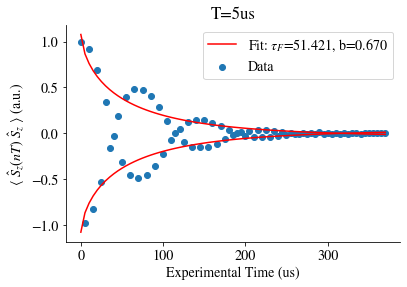

array([9.28364497, 0.11978006, 0.04656906, 0.11737716])

In [88]:
fancy_fit(vals_ih_fit[0],T_list[0])

C:\Users\awsta\AppData\Local\Temp\ipykernel_42272\3062428837.py:2: RuntimeWarning: invalid value encountered in power
  return d * np.exp(- (x / a) ** b ) + c


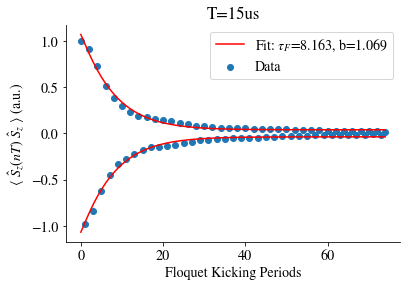

array([0.2361597 , 0.04179024, 0.00382673, 0.02095536])

In [89]:
fancy_fit(vals_ih_fit[1],T_list[1],real_time=False,save="ih_fit_T15")

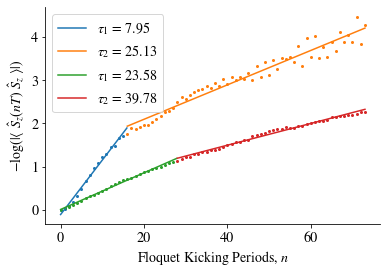

In [90]:
two_timescale_fit(vals_ih_fit[1],16,0,use_title=False,show=False)
two_timescale_fit(vals_ih_fit[2],28,0,"test",use_title=False)

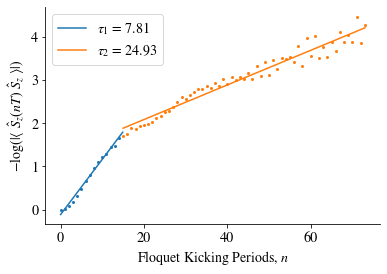

In [91]:
two_timescale_fit_adaptive(vals_ih_fit[1],0,"ih_twot_T15_adaptive",use_title=False)

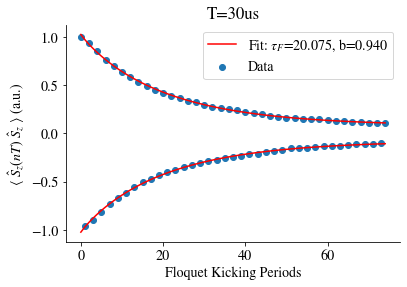

array([0.22611039, 0.01476233, 0.00452276, 0.0088071 ])

In [92]:
fancy_fit(vals_ih_fit[2],T_list[2],real_time=False,save="ih_fit_T30")

C:\Users\awsta\AppData\Local\Temp\ipykernel_42272\3062428837.py:2: RuntimeWarning: invalid value encountered in power
  return d * np.exp(- (x / a) ** b ) + c


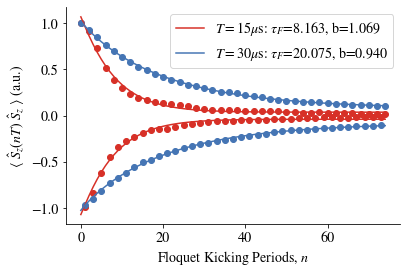

In [126]:
decay1=abs(vals_ih_fit[1])
decay2=abs(vals_ih_fit[2])
x = np.arange(0,len(decay1))

guess=25

popt1, pcov1 = curve_fit(func, x, decay1, p0=[guess, 4/5, 0, 1])
perr1 = np.sqrt(np.diag(pcov1))

popt2, pcov2 = curve_fit(func, x, decay2, p0=[guess, 4/5, 0, 1])
perr2 = np.sqrt(np.diag(pcov2))

plt.plot(x, func(x, *popt1), label=r'$T=15\mu$s: $\tau_F$=%5.3f, b=%5.3f' % tuple(popt1[0:2]),color=colors[0])
plt.plot(x, -func(x, *popt1), color=colors[0])
plt.plot(x, func(x, *popt2), label=r'$T=30\mu$s: $\tau_F$=%5.3f, b=%5.3f' % tuple(popt2[0:2]),color=colors[-1])
plt.plot(x, -func(x, *popt2), color=colors[-1])

plt.scatter(x, vals_ih_fit[1],color=colors[0])
plt.scatter(x, vals_ih_fit[2],color=colors[-1])

plt.xlabel(r"Floquet Kicking Periods, $n$")

plt.ylabel(zcorr_str)

plt.yticks(np.arange(-1, 1.5, .5))

plt.legend()

save = "t15_t30_fit"
plt.savefig(save+".pdf", format='pdf', dpi=900,bbox_inches='tight')
plt.show()

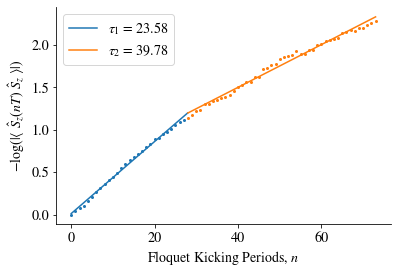

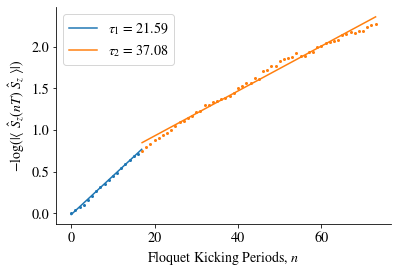

In [94]:
two_timescale_fit(vals_ih_fit[2],28,0,"ih_twot_T30",use_title=False)
two_timescale_fit_adaptive(vals_ih_fit[2],0,"ih_twot_T30_adaptive",use_title=False)
#single_fit(vals_ih_fit[2],0,"ih_onet_T30",use_title=False)

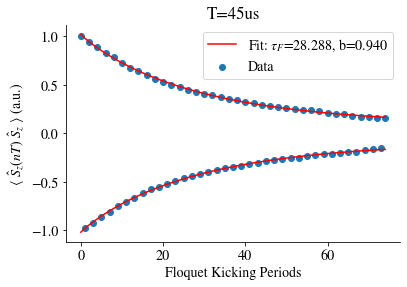

array([0.4821179 , 0.0166765 , 0.0082893 , 0.01182419])

In [95]:
fancy_fit(vals_ih_fit[3],T_list[3],real_time=False,save="ih_fit_T45")

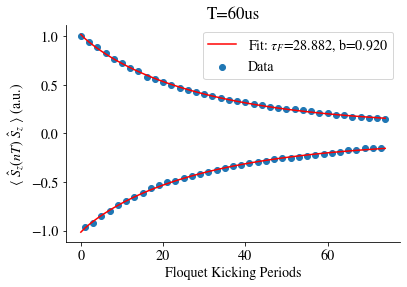

array([0.52835493, 0.0164661 , 0.00895464, 0.01250171])

In [96]:
fancy_fit(vals_ih_fit[4],T_list[4],real_time=False,save="ih_fit_T60")

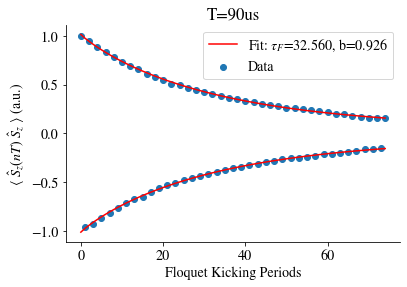

array([0.69445334, 0.01682215, 0.01095561, 0.01427081])

In [97]:
fancy_fit(vals_ih_fit[5],T_list[5],real_time=False,save="ih_fit_T90")

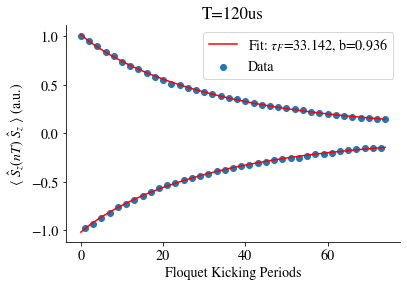

array([0.64153493, 0.01532552, 0.01024735, 0.01325038])

In [98]:
fancy_fit(vals_ih_fit[6],T_list[6],real_time=False,save="ih_fit_T120")

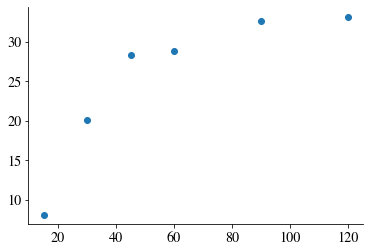

In [99]:
period=np.array(T_list[1:])
decay_scale = np.array([8.163, 20.075, 28.288,28.88, 32.560, 33.142])
plt.scatter(period,decay_scale)
plt.show()

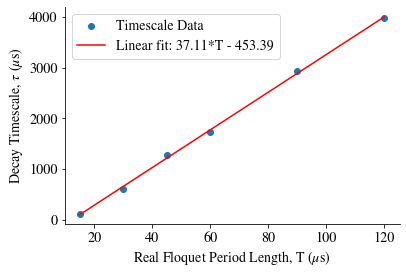

In [100]:
real_decay_scale=np.array([a*b for a,b in zip(period,decay_scale)])
plt.scatter(period, real_decay_scale,label="Timescale Data")
p = np.polyfit(period,real_decay_scale,1)
f = (p[0]*period+p[1])
plt.plot(period,f,label=r"Linear fit: {:.2f}*T - {:.2f}".format(p[0],abs(p[1])),color="red")
#plt.plot(period,f,label=r"Linear fit",color="red")
plt.xlabel(r"Real Floquet Period Length, T ($\mu$s)")
plt.ylabel(r"Decay Timescale, $\tau$ ($\mu$s)")
plt.legend()
plt.savefig("timescale_dependence_fit.pdf", format='pdf', dpi=900,bbox_inches='tight')
plt.show()

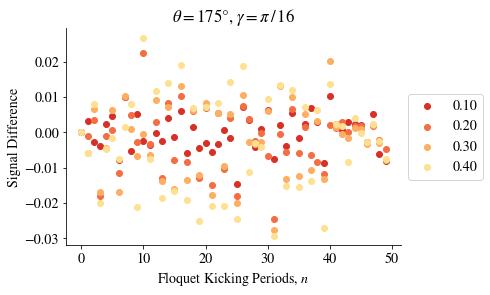

In [125]:
# u = 0.05
# \theta = 175

try:
    vals175_var_dis = pickle.load(open("vals175_var_dis.dat", "rb"))
except (OSError, IOError) as e:
    vals175_var_dis = nmr.Experiment(583).load_tpc3d()
    with open('vals175_var_dis.dat', 'wb') as fi:
        pickle.dump(vals175_var_dis, fi)
        
cnst1 = [0,.1,.2,.3,.4]

kicks = np.arange(0,vals175_var_dis.shape[1])

for idx, vals in enumerate(vals175_var_dis[1:]):
    rel = [val-ref for val,ref in zip(vals,vals175_var_dis[0])]
    plt.scatter(kicks, rel, label=r"{:.2f}".format(cnst1[idx+1]), color=colors[idx])    
plt.legend()
plt.xlabel(r"Floquet Kicking Periods, $n$")
plt.ylabel(r"Signal Difference")
plt.title(r"$\theta=175$" + "\xb0" + r", $\gamma=\pi\,/\,16$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("dis_diff_175.pdf", format='pdf', dpi=900,bbox_inches='tight')
plt.show()

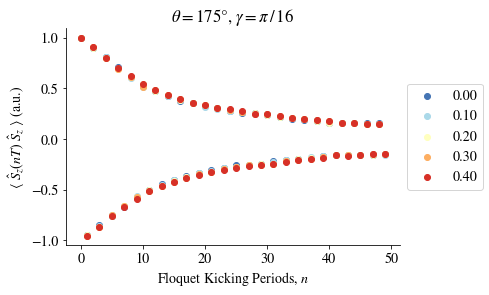

In [124]:
colors.reverse()
for idx, vals in enumerate(vals175_var_dis):
    plt.scatter(kicks, vals, label=r"{:.2f}".format(cnst1[idx]), color=colors[idx*2])    
plt.legend()
plt.xlabel(r"Floquet Kicking Periods, $n$")
plt.ylabel(zcorr_str)
plt.title(r"$\theta=175$" + "\xb0" + r", $\gamma=\pi\,/\,16$")
plt.yticks(np.arange(-1, 1.5, .5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("dis_trace_175.pdf", format='pdf', dpi=900,bbox_inches='tight')
plt.show()

colors.reverse()

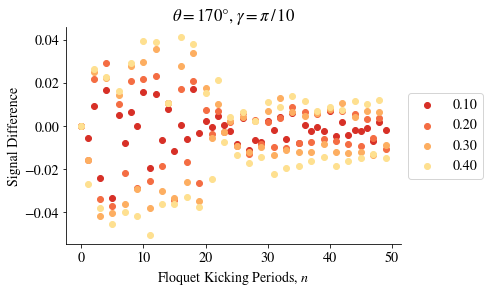

In [123]:
# u = 0.08
# \theta = 170

try:
    vals170_var_dis = pickle.load(open("vals170_var_dis.dat", "rb"))
except (OSError, IOError) as e:
    vals170_var_dis = nmr.Experiment(584).load_tpc3d()
    with open('vals170_var_dis.dat', 'wb') as fi:
        pickle.dump(vals170_var_dis, fi)
        
cnst1 = [0,.1,.2,.3,.4]

kicks = np.arange(0,vals170_var_dis.shape[1])

for idx, vals in enumerate(vals170_var_dis[1:]):
    rel = [(val-ref) for val,ref in zip(vals,vals170_var_dis[0])]
    plt.scatter(kicks, rel, label=r"{:.2f}".format(cnst1[idx+1]), color=colors[idx])    
plt.legend()
plt.xlabel(r"Floquet Kicking Periods, $n$")
plt.ylabel(r"Signal Difference")
plt.title(r"$\theta=170$" + "\xb0" + r", $\gamma=\pi\,/\,10$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("dis_diff_170u08.pdf", format='pdf', dpi=900,bbox_inches='tight')

plt.show()

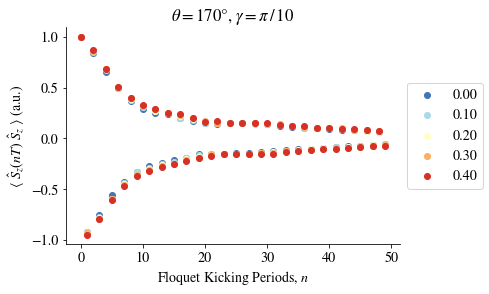

In [122]:
colors.reverse()
for idx, vals in enumerate(vals170_var_dis):
    plt.scatter(kicks, vals, label=r"{:.2f}".format(cnst1[idx]), color=colors[idx*2])    
plt.legend()
plt.xlabel(r"Floquet Kicking Periods, $n$")
plt.ylabel(zcorr_str)
plt.title(r"$\theta=170$" + "\xb0" + r", $\gamma=\pi\,/\,10$")
plt.yticks(np.arange(-1, 1.5, .5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("dis_trace_170u08.pdf", format='pdf', dpi=900,bbox_inches='tight')
plt.show()

colors.reverse()

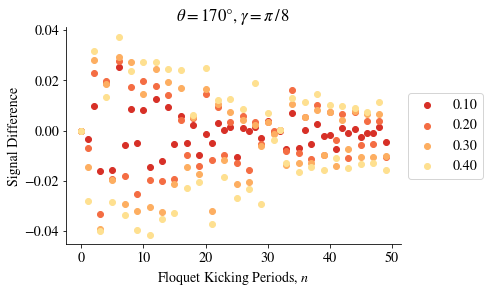

In [121]:
# u = 0.1
# \theta = 170

try:
    vals170u1_var_dis = pickle.load(open("vals170u1_var_dis.dat", "rb"))
except (OSError, IOError) as e:
    vals170u1_var_dis = nmr.Experiment(585).load_tpc3d()
    with open('vals170u1_var_dis.dat', 'wb') as fi:
        pickle.dump(vals170u1_var_dis, fi)
        
cnst1 = [0,.1,.2,.3,.4]

kicks = np.arange(0,vals170u1_var_dis.shape[1])

for idx, vals in enumerate(vals170u1_var_dis[1:]):
    rel = [(val-ref) for val,ref in zip(vals,vals170u1_var_dis[0])]
    plt.scatter(kicks, rel, label=r"{:.2f}".format(cnst1[idx+1]), color=colors[idx])    
plt.legend()
plt.xlabel(r"Floquet Kicking Periods, $n$")
plt.ylabel(r"Signal Difference")
plt.title(r"$\theta=170$" + "\xb0" + r", $\gamma=\pi\,/\,8$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("dis_diff_170u10.pdf", format='pdf', dpi=900,bbox_inches='tight')

plt.show()

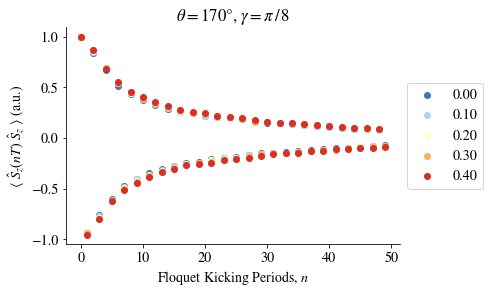

In [120]:
colors.reverse()
for idx, vals in enumerate(vals170u1_var_dis):
    plt.scatter(kicks, vals, label=r"{:.2f}".format(cnst1[idx]), color=colors[idx*2])    
plt.legend()
plt.xlabel(r"Floquet Kicking Periods, $n$")
plt.ylabel(zcorr_str)
plt.title(r"$\theta=170$" + "\xb0" + r", $\gamma=\pi\,/\,8$")
plt.yticks(np.arange(-1, 1.5, .5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("dis_trace_170u10.pdf", format='pdf', dpi=900,bbox_inches='tight')

plt.show()

colors.reverse()

C:\Users\awsta\Documents\workspace\qeg-env\lib\site-packages\nmrglue\fileio\bruker.py:394: UserWarning: Error reading the pulse program
  warn('Error reading the pulse program')


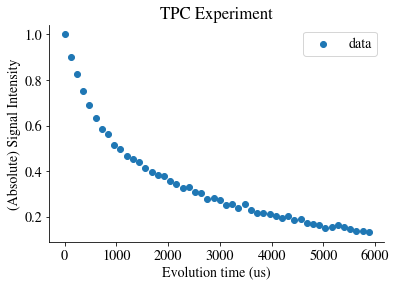

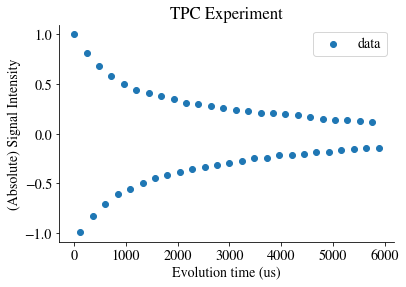

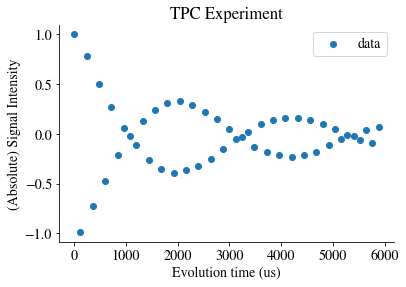

In [107]:
vals_loc_nonint0 = nmr.Experiment(594).tpc(add_spline=False)
vals_loc_nonint180 = nmr.Experiment(595).tpc(add_spline=False)
vals_loc_nonint170 = nmr.Experiment(596).tpc(add_spline=False)
kicks = np.arange(0,50,1)

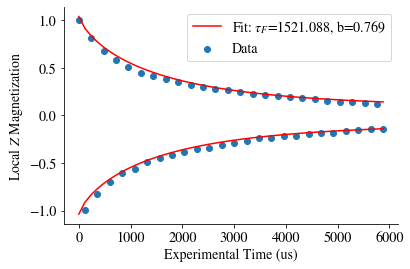

array([1.19817839e+02, 5.84193646e-02, 2.87213791e-02, 4.58117311e-02])

In [108]:
fancy_fit(vals_loc_nonint180,120,real_time=True,save="nonint_loc_fit",use_title=False,ylabel=r"Local $Z$ Magnetization")

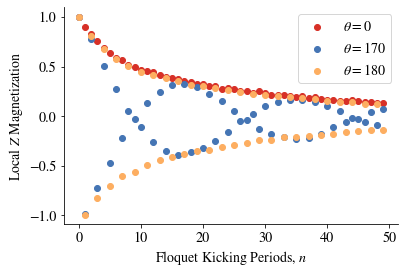

In [127]:
def get_sub(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s))
    return x.translate(res)

plt.scatter(kicks,vals_loc_nonint0,label=r"$\theta = 0$", color=colors[0])
plt.scatter(kicks,vals_loc_nonint170,label=r"$\theta = 170$", color=colors[-1])
plt.scatter(kicks,vals_loc_nonint180,label=r"$\theta = 180$", color=colors[2])
plt.legend()
plt.xlabel(r"Floquet Kicking Periods, $n$")
plt.ylabel(r"Local $Z$ Magnetization")
plt.yticks(np.arange(-1, 1.5, .5))
plt.savefig("nonint_loc.pdf", format='pdf', dpi=900,bbox_inches='tight')
plt.show()

In [110]:
(120*10**(-6)*32.76*10**(3))

3.931199999999999

In [111]:
32.76*10**(3)/(2*np.pi)

5213.915935690491

In [112]:
gammaF = 251.662*10**6 # rad/s/T
B = 7.1 # T
hbar = 1.05457*10**(-34) # J s / rad
dx = .5*6.878*10**(-10) # m
mu0 = 4*np.pi*10**-7
T = 120*10**-6

In [113]:
omega = gammaF*B*10**-6/(2*np.pi)

In [114]:
J=(10**-7) * hbar * gammaF * gammaF * (1-3*np.cos(0)**2) / dx**3

In [115]:
gammFloq = -J*T/np.pi


In [116]:
(np.pi/J)*10**6

-95.65456577935265

In [117]:
x = 1.25*np.pi/J

In [118]:
x*10**6

-119.56820722419081

In [119]:
gammFloq

1.254514084323013

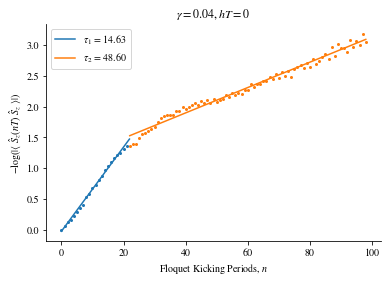

In [60]:
two_timescale_fit_adaptive(vals175z0[2],(cnst2[2],0))